In [106]:
%matplotlib inline      
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import seaborn as sns
import statistics as st
import re

In [107]:
df=pd.read_csv('C:/Users/Keerthi Priya/Desktop/semester notes/sem-5/DA/asn-1,13-8/2019_Results_Winning_Candidate.csv',encoding="latin-1")

In [108]:
df.shape

(542, 6)

# STATEWISE NO-OF-SEATS FOR EACH PARTY

In [109]:
df1=df.groupby('State').Party.value_counts().reset_index(name='No_of_seats')

In [110]:
df_n=pd.DataFrame(df1)
#df_n.duplicated(['State'],keep=False)
df_n

,State,Party,No_of_seats
0,Andaman & Nicobar Islands,Indian National Congress,1
1,Andhra Pradesh,Yuvajana Sramika Rythu Congress Party,21
2,Andhra Pradesh,Telugu Desam,2
3,Andhra Pradesh,Telugu Desam,1
4,Andhra Pradesh,Yuvajana Sramika Rythu Congress Party,1
5,Arunachal Pradesh,Bharatiya Janata Party,2
6,Assam,Bharatiya Janata Party,9
7,Assam,Indian National Congress,3
8,Assam,All India United Democratic Front,1
9,Assam,Independent,1


# TOP 5 PARTIES WITH HIGHEST NUMBER OF SEATS

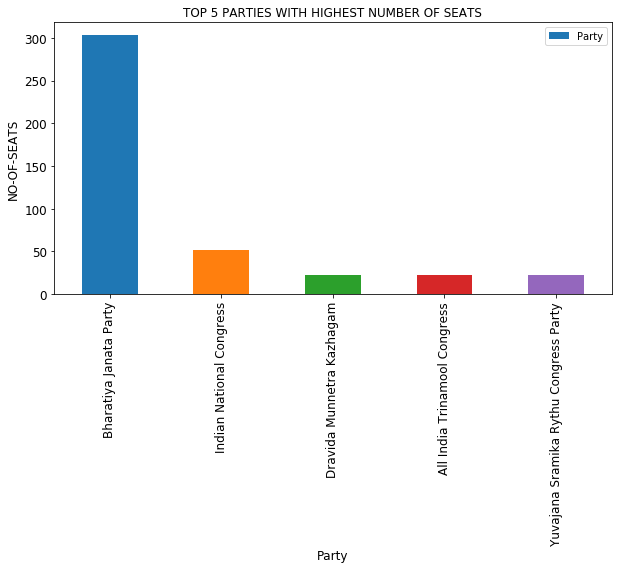

In [176]:
df2=df.Party.value_counts().head()
#ax = df2.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax=df2.plot.bar(title ="TOP 5 PARTIES WITH HIGHEST NUMBER OF SEATS",figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Party", fontsize=12)
ax.set_ylabel("NO-OF-SEATS", fontsize=12)
plt.show()


# STATEWISE HIGHEST NUMBER OF SEATS

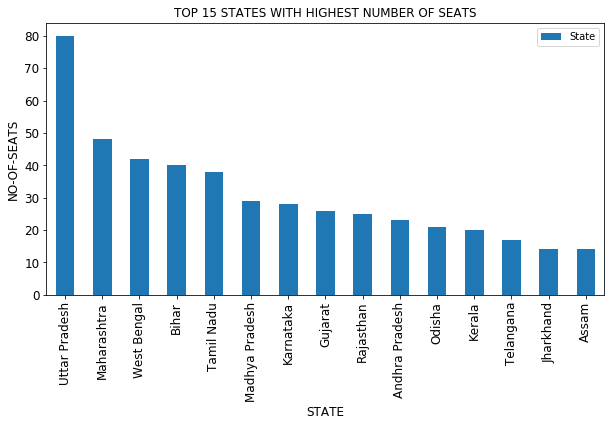

In [196]:
df3=pd.DataFrame(df.State.value_counts().head(15))
df3.rename_axis(None)
ax=df3.plot.bar(title ="TOP 15 STATES WITH HIGHEST NUMBER OF SEATS",figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("STATE", fontsize=12)
ax.set_ylabel("NO-OF-SEATS", fontsize=12)
plt.show()

# STATEWISE TOTAL NUMBER OF VOTES

In [206]:
df4=df.groupby('State').Votes.sum().reset_index(name='total-votes').nlargest(10,'total-votes')

In [207]:
df4

,State,total-votes
34,Uttar Pradesh,45708972
20,Maharashtra,27959632
36,West Bengal,27195568
31,Tamil Nadu,22380003
5,Bihar,21766888
19,Madhya Pradesh,21444423
29,Rajasthan,19628443
16,Karnataka,19105308
11,Gujarat,18091484
1,Andhra Pradesh,14424267


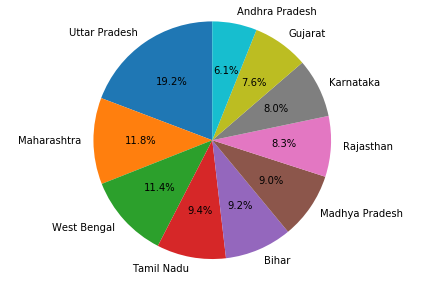

In [208]:
plt.pie(
    df4['total-votes'],
    labels=df4['State'],
    shadow=False,
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

# top 10 candidates with highest votes 

In [210]:
df4=df.nlargest(10,'Votes')

In [212]:
df4.set_index('Candidate')

,State,Constituency,Votes,Percentage,Party
Candidate,,,,,
SHANKAR LALWANI,Madhya Pradesh,INDORE,1068569,65.59,Bharatiya Janata Party
QUEEN OJA,Assam,Gauhati,1008936,57.20,Bharatiya Janata Party
Chandra Prakash Joshi,Rajasthan,Chittorgarh,982942,67.38,Bharatiya Janata Party
C. R. Patil,Gujarat,Navsari,972739,74.37,Bharatiya Janata Party
Vijay Kumar Singh,Uttar Pradesh,Ghaziabad,944503,61.96,Bharatiya Janata Party
SUBHASH CHANDRA BAHERIA,Rajasthan,Bhilwara,938160,71.59,Bharatiya Janata Party
Ramcharan Bohra,Rajasthan,Jaipur,924065,63.45,Bharatiya Janata Party
KRISHAN PAL,Haryana,Faridabad,913222,68.80,Bharatiya Janata Party
Sanjay Bhatia,Haryana,Karnal,911594,70.08,Bharatiya Janata Party
